In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import plotly.express as px

In [3]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

/opt/homebrew/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/homebrew/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [4]:
questionaire_df = pd.read_csv('/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Galactagogue_buying_patterns/data/Ryan_DataforRay_MissingReplaced_2022.09.30.csv')
questionaire_df.head(20)

,ID,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,1,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2,3,2,2,2,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2
1,2,1,2,2,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2
2,3,1,1,2,2,1,1,1,1,1,1,3,3,3,2,1,1,1,3,1,3,1,2,2,3,3,3,3,3,3,2,3,3,3,1,2,1,2,1,3,3,1,2,1,2,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,3,2,1,1,2
3,4,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,2,2,1,1,1,2,1,2,2,2,2,2,2,2,2
4,5,1,1,2,2,1,1,3,2,2,3,3,3,3,2,1,1,1,3,2,1,1,2,1,3,3,3,3,3,3,3,3,3,3,2,2,2,3,3,3,2,3,3,3,2,1,2,2,1,1,2,2,1,1,1,2,1,1,1,1,2,2,2,1,2
5,6,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,2,3,3,3,3,3,3,3,2,1,2,1,1,1,1,2,2,1,1,2,1,1,2,2,2,2,1,2,2
6,7,1,2,2,3,2,2,2,3,1,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,1,3,3,3,3,3,3,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2
7,8,1,2,2,1,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,1,1,1,-99,1,-99,1,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,3,1,1,1,1,1,1,1,2,2,1,1,1,1,2,1,1,1,2,1,2,2,1,-99,2,2,1,1
8,9,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,3,1,2,2,2,1,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2
9,10,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2


In [5]:
questionaire_df.shape

(1420, 65)

Checking for null values.

In [6]:
questionaire_df.isna().sum() 

ID              0
everbev         0
everherb        0
evermed         0
oats            0
               ..
onlineforum     0
blog            0
websites        0
searchengine    0
app             0
Length: 65, dtype: int64

In [7]:
questionaire_df.columns

Index(['ID', 'everbev', 'everherb', 'evermed', 'oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat', 'ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle', 'domperidone', 'metaclopramide',
       'increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress',
       'coparent', 'family', 'friend', 'lactationconsult', 'pediatrician',
       'obgyn', 'midwife', 'doula', 'nurse', 'wic', 'hospital', 'books',
       'facebook', 'instagram', 'twitter', 'pinterest', 'onlineforum', 'blog',
       'websites', 'searchengine', 'app'],
      dtype='object')

For our analysis, we are only selecting the galactagogues

In [8]:
inf_sources = ['ID','coparent', 'family', 'friend', 'lactationconsult', 'pediatrician',
       'obgyn', 'midwife', 'doula', 'nurse', 'wic', 'hospital', 'books',
       'facebook', 'instagram', 'twitter', 'pinterest', 'onlineforum', 'blog',
       'websites', 'searchengine', 'app']
inf_sources_df = pd.DataFrame(data = questionaire_df, columns = inf_sources)
inf_sources_df.head()

,ID,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2
2,3,2,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,3,2,1,1,2
3,4,1,1,2,1,2,2,2,2,1,1,1,2,1,2,2,2,2,2,2,2,2
4,5,2,1,2,2,1,1,2,2,1,1,1,2,1,1,1,1,2,2,2,1,2


# Exploratory Data Analysis

In [9]:
inf_sources_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                1420 non-null   int64
 1   coparent          1420 non-null   int64
 2   family            1420 non-null   int64
 3   friend            1420 non-null   int64
 4   lactationconsult  1420 non-null   int64
 5   pediatrician      1420 non-null   int64
 6   obgyn             1420 non-null   int64
 7   midwife           1420 non-null   int64
 8   doula             1420 non-null   int64
 9   nurse             1420 non-null   int64
 10  wic               1420 non-null   int64
 11  hospital          1420 non-null   int64
 12  books             1420 non-null   int64
 13  facebook          1420 non-null   int64
 14  instagram         1420 non-null   int64
 15  twitter           1420 non-null   int64
 16  pinterest         1420 non-null   int64
 17  onlineforum       1420 non-null  

There are 1420 non null rows in the data set with all the columns having integer datatype.

Dropping the rows having -99 value as it signifies missing responses from the candidate.

In [10]:
inf_sources_df=inf_sources_df.replace(-99,np.nan).dropna(axis = 0, how = 'any')

In [11]:
inf_sources_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1248.0,706.211538,412.678615,1.0,348.5,711.5,1064.25,1420.0
coparent,1248.0,1.962340,0.293241,1.0,2.0,2.0,2.00,3.0
family,1248.0,1.710737,0.486033,1.0,1.0,2.0,2.00,3.0
friend,1248.0,1.625801,0.528460,1.0,1.0,2.0,2.00,3.0
lactationconsult,1248.0,1.332532,0.492933,1.0,1.0,1.0,2.00,3.0
pediatrician,1248.0,1.714744,0.511652,1.0,1.0,2.0,2.00,3.0
obgyn,1248.0,1.801282,0.467653,1.0,2.0,2.0,2.00,3.0
midwife,1248.0,1.887821,0.369545,1.0,2.0,2.0,2.00,3.0
doula,1248.0,1.948718,0.275602,1.0,2.0,2.0,2.00,3.0
nurse,1248.0,1.619391,0.532964,1.0,1.0,2.0,2.00,3.0


In [12]:
inf_sources_df.facebook.value_counts()

1.0    751
2.0    453
3.0     44
Name: facebook, dtype: int64

In [13]:
inf_sources_df.iloc[:,1:].shape

(1248, 21)

Replacing with 1 with True while 2 and 3 with False

In [14]:
inf_sources_df = inf_sources_df.iloc[:,1:].replace({3: False,1: True, 2: False}, regex = True)

In [15]:
inf_sources_df.head(10)

,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,True,True,True,True,False,True,False,True,True,False,False,True,False,False,False,False,False,True,True,False
3,True,True,False,True,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,True,True,False,False,True,True,True,False,True,True,True,True,False,False,False,True,False
5,False,True,False,True,True,True,True,False,False,True,True,False,True,True,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
8,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
sources_counts = []
for i in inf_sources_df.columns:
    sources_counts.append((inf_sources_df[i] == True).sum())
sources_counts.sort(reverse = True)

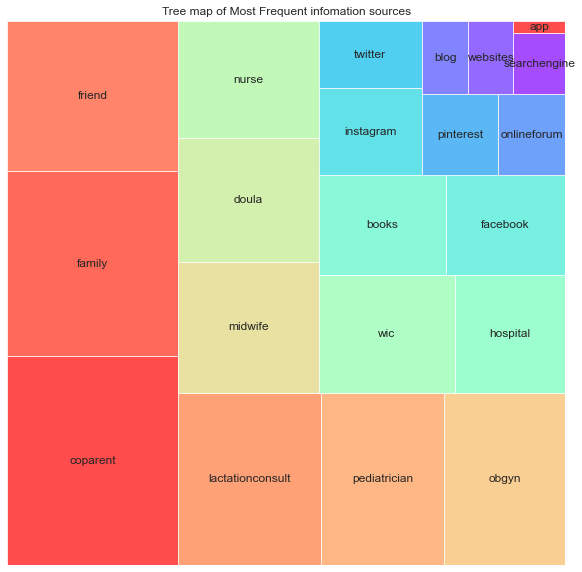

In [17]:
# Tree Map of Most Frequent Items
import squarify
plt.rcParams['figure.figsize']=(10,10)
Items = inf_sources_df.columns
size = sources_counts
#lab = Items.index
color = plt.cm.rainbow_r(np.linspace(0,1,20))
squarify.plot(sizes=size, label=Items, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent infomation sources')
plt.axis('off')
plt.show()

__TERMINOLOGIES__

__Support__ : Its the default popularity of an item. In mathematical terms, the support of item A is the ratio of transactions involving A to the total number of transactions.

__Confidence__ : Likelihood that customer will buy both products A and B. It is the ratio of the number of transactions involving both A and B and the number of transactions involving B.
    
    Confidence(A => B) = Support(A, B)/Support(A)

__Lift__ : Increase in the sale of A when you sell B.

    Lift(A => B) = Confidence(A, B)/Support(B)

    Lift (A => B) = 1 means that there is no correlation within the itemset.

    Lift (A => B) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, A, and B, are more likely to be bought together.
    
    Lift (A => B) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, A, and B, are unlikely to be bought together.

Calculating the support for each of the galactagogues

In [18]:
#Calculate the support
support = inf_sources_df.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support

,support
lactationconsult,0.677885
facebook,0.601763
searchengine,0.488782
websites,0.467147
nurse,0.404647
friend,0.396635
hospital,0.350962
onlineforum,0.331731
pediatrician,0.314103
family,0.304487


__Apriori Algorithm:__ refers to the algorithm which is used to calculate the association rules between objects. It means how two or more objects are related to one another. In other words, we can say that the apriori algorithm is an association rule leaning that analyzes that people who bought product A also bought product B.

Apriori algorithm assumes that any subset of a frequent itemset must be frequent. Its the algorithm behind Market Basket Analysis. Say, a transaction containing {Grapes, Apple, Mango} also contains {Grapes, Mango}. So, according to the principle of Apriori, if {Grapes, Apple, Mango} is frequent, then {Grapes, Mango} must also be frequent.

In [19]:
frequent_itemsets = apriori(inf_sources_df, min_support= 0.05, use_colnames=True, max_len = 3)
rules = association_rules(frequent_itemsets, metric="confidence",  min_threshold = 0.5)

Closed frequent itemsets were generated at a minimum support value of 5%, (i.e. thepattern of variable values was observed in at least 5% of the dataset)

Rules were generated that met a confidence level of 50% (i.e. in at least 50% of the cases thatxwasobserved,ywas also observed).

In [20]:
display(rules.sort_values(by ='confidence', ascending=False).head(20))
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
351,"(nurse, app)",(lactationconsult),0.060096,0.677885,0.059295,0.986667,1.455508,0.018557,24.158654
331,"(nurse, books)",(lactationconsult),0.070513,0.677885,0.065705,0.931818,1.374597,0.017906,4.724359
307,"(obgyn, instagram)",(lactationconsult),0.055288,0.677885,0.050481,0.913043,1.346901,0.013002,3.704327
173,"(friend, hospital)",(lactationconsult),0.174679,0.677885,0.159455,0.912844,1.346607,0.041043,3.695850
327,"(nurse, hospital)",(lactationconsult),0.229968,0.677885,0.207532,0.902439,1.331258,0.051640,3.301683
298,"(obgyn, nurse)",(lactationconsult),0.163462,0.677885,0.147436,0.901961,1.330552,0.036628,3.285577
324,"(nurse, wic)",(lactationconsult),0.089744,0.677885,0.080929,0.901786,1.330294,0.020094,3.279720
371,"(websites, hospital)",(lactationconsult),0.187500,0.677885,0.169071,0.901709,1.330181,0.041967,3.277174
345,"(nurse, websites)",(lactationconsult),0.217147,0.677885,0.195513,0.900369,1.328204,0.048312,3.233084
367,"(pinterest, hospital)",(lactationconsult),0.088141,0.677885,0.079327,0.900000,1.327660,0.019577,3.221154


Rules identified:  664


Another set of rules are generated using metric as "lift".

In [21]:
rules_1 = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.2)

In [22]:
display(rules_1.sort_values(by ='lift', ascending=False).head(10))
print("Rules identified: ", len(rules_1))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
971,(obgyn),"(pediatrician, hospital)",0.228365,0.166667,0.099359,0.435088,2.610526,0.061298,1.475155
970,"(pediatrician, hospital)",(obgyn),0.166667,0.228365,0.099359,0.596154,2.610526,0.061298,1.910714
1540,"(onlineforum, searchengine)",(app),0.221154,0.103365,0.057692,0.260870,2.523761,0.034833,1.213094
1541,(app),"(onlineforum, searchengine)",0.103365,0.221154,0.057692,0.558140,2.523761,0.034833,1.762652
964,"(pediatrician, nurse)",(obgyn),0.205929,0.228365,0.118590,0.575875,2.521728,0.071563,1.819359
965,(obgyn),"(pediatrician, nurse)",0.228365,0.205929,0.118590,0.519298,2.521728,0.071563,1.651899
214,"(pediatrician, family)",(obgyn),0.125801,0.228365,0.071314,0.566879,2.482333,0.042585,1.781568
215,(obgyn),"(pediatrician, family)",0.228365,0.125801,0.071314,0.312281,2.482333,0.042585,1.271156
438,(pediatrician),"(obgyn, friend)",0.314103,0.108173,0.081731,0.260204,2.405442,0.047753,1.205504
435,"(obgyn, friend)",(pediatrician),0.108173,0.314103,0.081731,0.755556,2.405442,0.047753,2.805944


Rules identified:  1550


__Antecedent:__ refers to the items on the LEFT ie., the item which the customer buy.

__Consequent:__ refers to the items on the RIGHT ie., the item which the customer follows to buy.

In [23]:
fig = px.scatter_3d(rules, x='confidence', y='support', z='lift', opacity=0.7, color='antecedents')
                    #color='petal_length', symbol='species')
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

/opt/homebrew/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/homebrew/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<>:24: DeprecationWarning:

invalid escape sequence \d

<>:24: DeprecationWarning:

invalid escape sequence \d

/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_52500/3930746849.py:24: DeprecationWarning:

invalid escape sequence \d



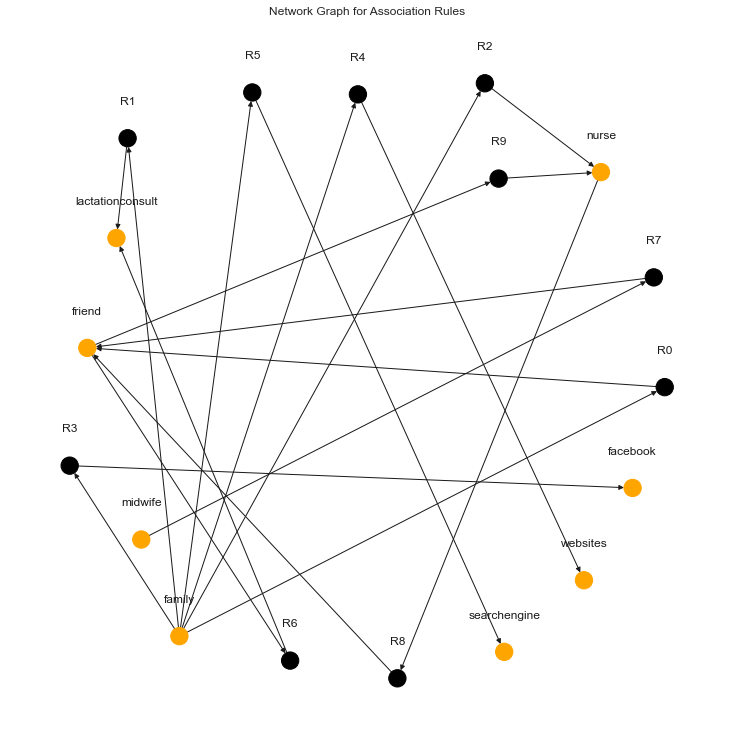

In [24]:
def draw_network(rules, rules_to_show):
      # Directional Graph from NetworkX
  network = nx.DiGraph(directed=True)
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12
  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 10)

__Inference:__

From the results it’s very clear that, higher the LIFT value, stronger the correlation between the antecedents and the consequents.

A lift greater than 1 suggests that the presence of the antecedent increases the chances that the consequent will occur in a given transaction.

Lift below 1 indicates that purchasing the antecedent reduces the chances of purchasing the consequent in the same transaction. Note: This could indicate that the items are seen by customers as alternatives to each other.
When the lift is 1, then purchasing the antecedent makes no difference on the chances of purchasing the consequent.
